# Init

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
import os     
import pydotplus
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\KJCHEN\\Miniconda3\\envs\\FDA\\Library\\bin\\graphviz'

---

# Original data

In [4]:
titanic = pd.read_csv('data/train.csv')

In [5]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


---

# Drop Columns

In [7]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
titanic.drop(cols_drop, axis=1, inplace=True)

---

# Handle Missing Values

In [8]:
age = titanic['Age']
age.fillna(value=round(age.mean()), inplace=True)

In [9]:
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})

In [10]:
# col = 'Pclass'
# one_hot = pd.get_dummies(titanic[col], prefix=col)
# titanic = pd.concat([titanic, one_hot], axis=1).drop(col, axis=1)

---

# Analysis

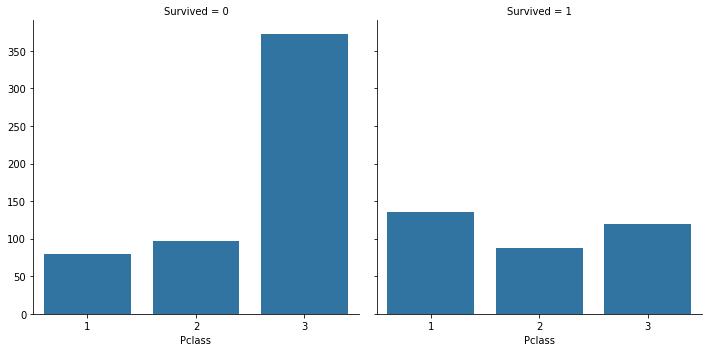

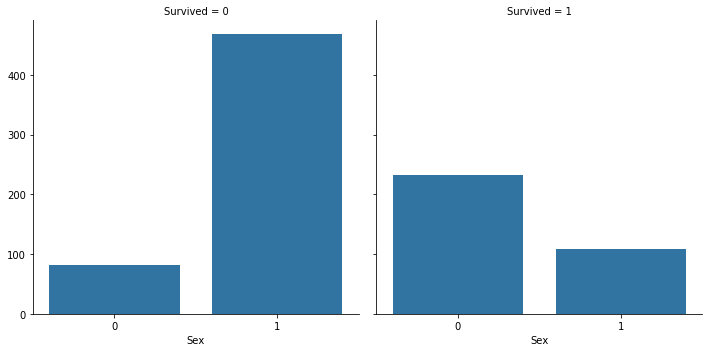

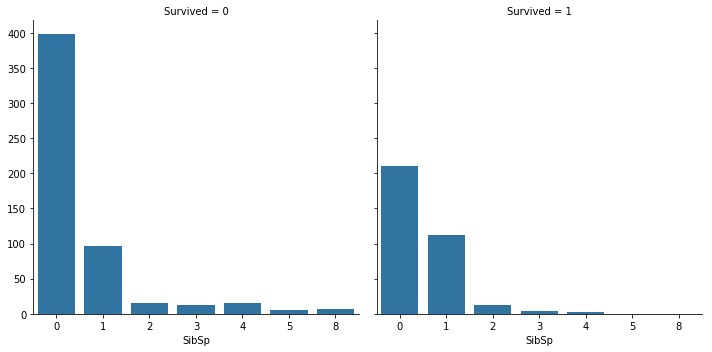

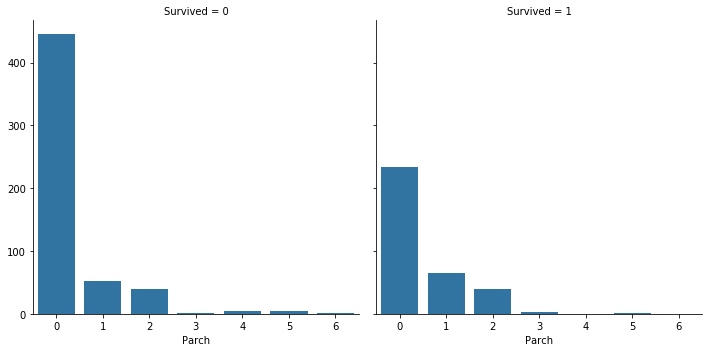

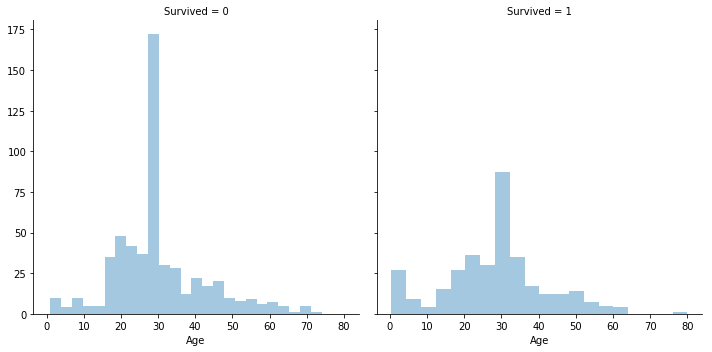

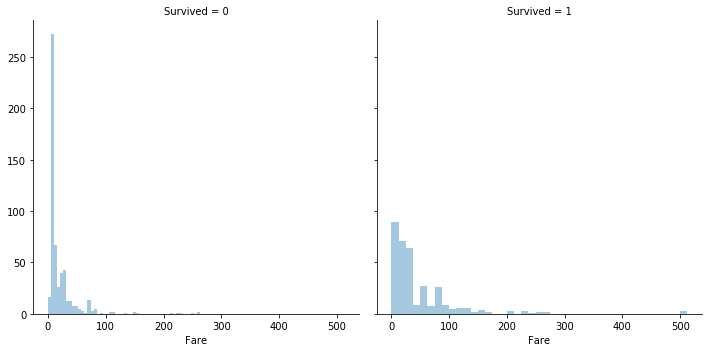

In [11]:
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.countplot, 'Pclass', order=sorted(titanic.Pclass.unique()));
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.countplot, 'Sex', order=sorted(titanic.Sex.unique()));
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.countplot, 'SibSp', order=sorted(titanic.SibSp.unique()));
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.countplot, 'Parch', order=sorted(titanic.Parch.unique()));
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.distplot, 'Age', kde=False);
sns.FacetGrid(titanic, col='Survived', height=5).map(sns.distplot, 'Fare', kde=False);

---

# Processed data

In [12]:
titanic.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
366,1,1,0,60.0,1,0,75.2500
402,0,3,0,21.0,1,0,9.8250
771,0,3,1,48.0,0,0,7.8542
600,1,2,0,24.0,2,1,27.0000
752,0,3,1,33.0,0,0,9.5000
591,1,1,0,52.0,1,0,78.2667
23,1,1,1,28.0,0,0,35.5000
614,0,3,1,35.0,0,0,8.0500
255,1,3,0,29.0,0,2,15.2458
842,1,1,0,30.0,0,0,31.0000


In [13]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


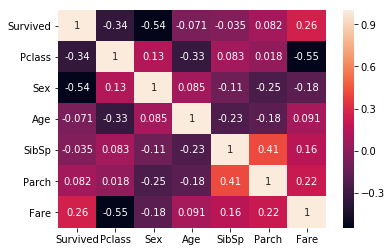

In [14]:
sns.heatmap(titanic.corr(), annot=True);

---

# Designed Rules

In [15]:
def draw_tree_with_rule(df, label, rule=None, name=None):
    if rule is not None:
        df = df[df.apply(rule, axis=1)==df[label]]
    
    X, y = df.drop(label, axis=1), df[label]
    
    dtc = DecisionTreeClassifier(max_depth=4, random_state=0)
    dtc.fit(X, y)

    dot_data = StringIO()
    export_graphviz(dtc, 
                    out_file=dot_data,  
                    filled=True, 
                    feature_names=list(X),
                    class_names=['die','survive'],
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    if name is not None:
        df.to_csv(f'generated/data_{name}.csv', index=False)
        graph.write_pdf(f'generated/tree_{name}.pdf')

    return Image(graph.create_png())

# base rule
rule = lambda x:\
    0 if x.Sex == 1 else\
    0 if x.Pclass == 3 else\
    0 if x.Fare <= 30 else\
    0 if x.Parch == 0 else\
    0 if x.Age >= 60 else\
    0 if x.SibSp == 0 else\
    1

## high correlation descending

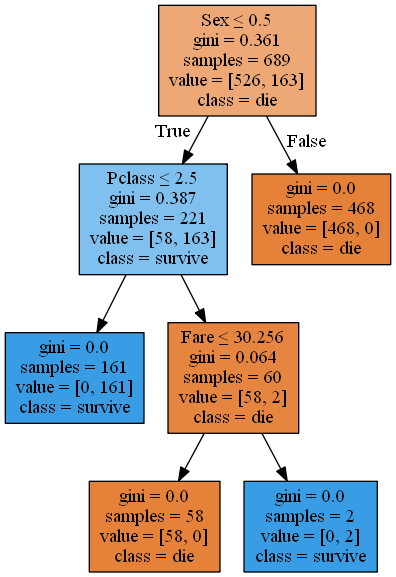

In [16]:
rule = lambda x:\
    0 if x.Sex == 1 else\
    1 if x.Pclass != 3 else\
    0 if x.Fare <= 30 else\
    1 if x.Parch != 0 else\
    0
draw_tree_with_rule(titanic.copy(),
                    'Survived',
                    rule=rule,
                    name='high_corr_desc'
                   )

## high correlation ascending

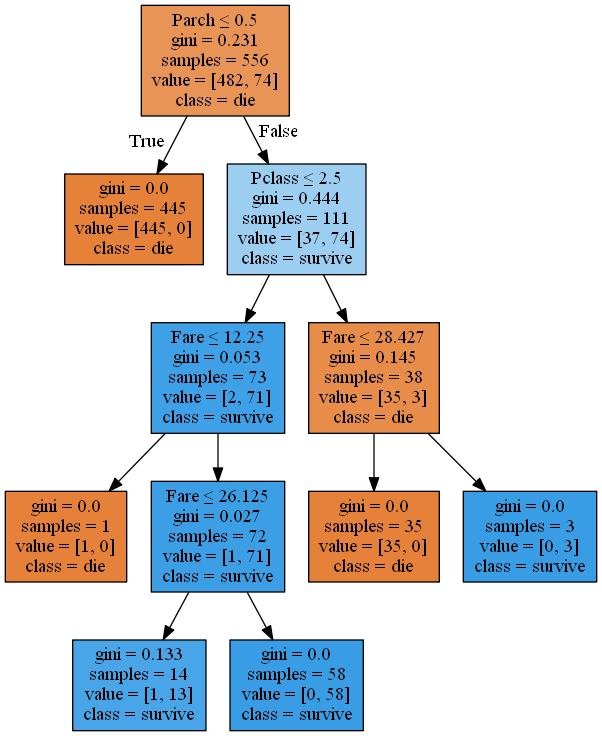

In [17]:
rule = lambda x:\
    0 if x.Parch == 0 else\
    1 if x.Fare > 26 else\
    0 if x.Pclass == 3 else\
    1 if x.Sex != 1 else\
    0
draw_tree_with_rule(titanic.copy(),
                    'Survived',
                    rule=rule,
                    name='high_corr_asc'
                   )

## tree structure (priority)

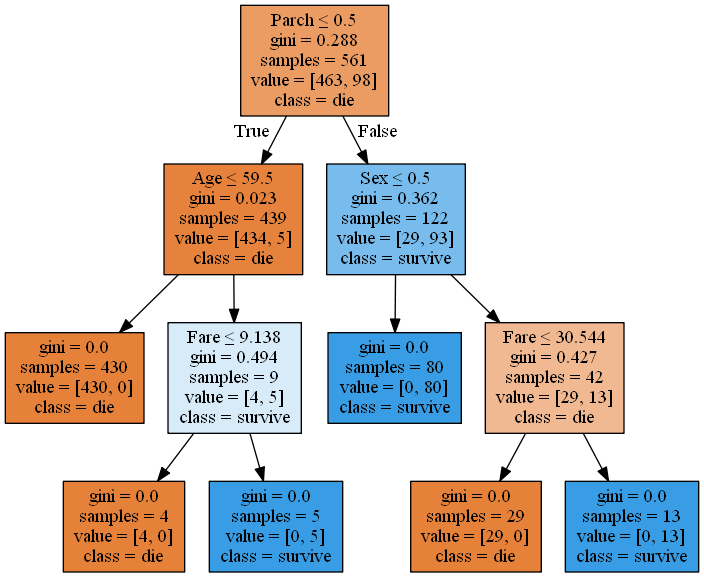

In [18]:
rule = lambda x:\
    (0 if x.Pclass == 3 else\
    1 if x.Age >= 60 else\
    0) if x.Parch == 0 else\
    (1 if x.Fare > 30 else\
    0 if x.Sex == 1 else\
    1)
draw_tree_with_rule(titanic.copy(),
                    'Survived',
                    rule=rule,
                    name='tree_priority'
                   )

## tree structure (randomness)

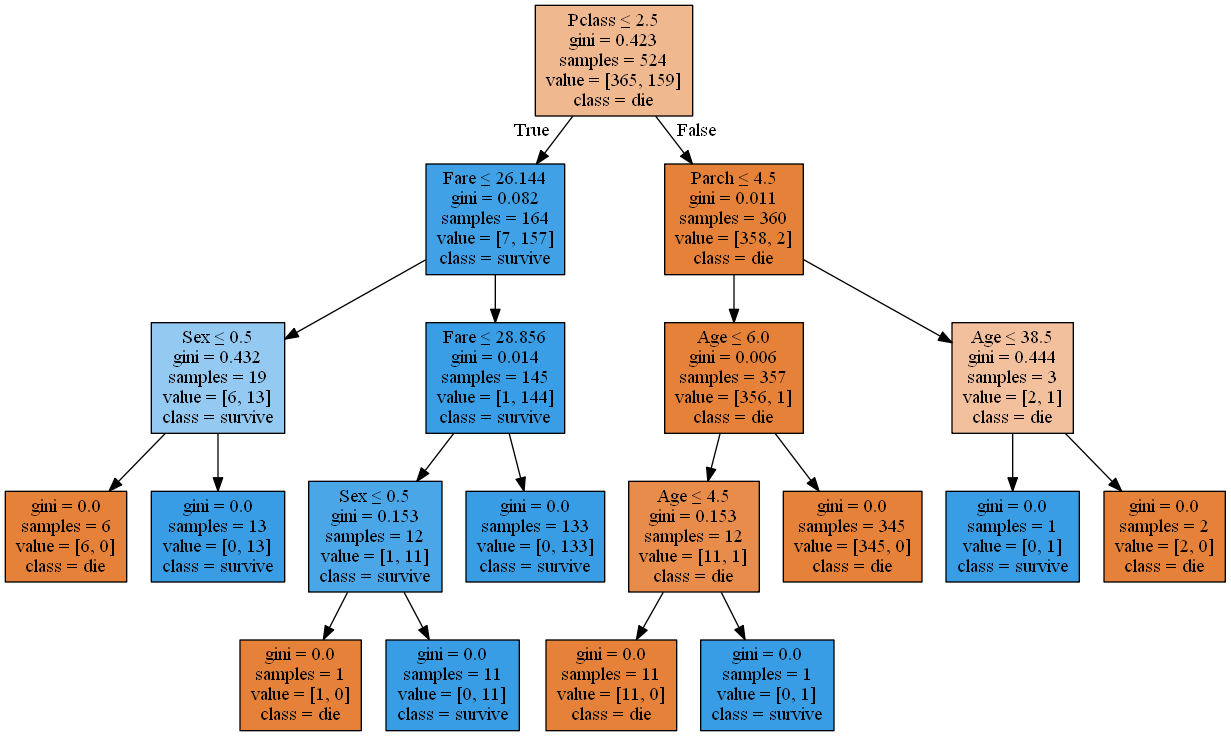

In [19]:
rule = lambda x:\
    (0 if x.Pclass == 3 else\
    1) if x.Sex == 1 else\
    (0 if x.Fare <= 30 else\
    1)
draw_tree_with_rule(titanic.copy(), 
                    'Survived', 
                    rule=rule,
                    name='tree_randomness'
                   )

In [20]:
assert False, 'breakpoint'

AssertionError: breakpoint

---

# Other Classifiers

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=len(X.columns),
#                              min_samples_split=round(len(X_train)*0.01),
#                              min_samples_leaf=round(len(X_train)*0.01),
                             max_features=None,
                             max_leaf_nodes=None,
                             n_jobs=-1,
                            )
cross_val_n_fold(rfc)

## SVM

In [ ]:
svc = SVC(C=1.0,
          kernel='linear',
          gamma='scale',
          max_iter=-1,
         )
cross_val_n_fold(svc)

## Logistic Regression (aka logit, MaxEnt) classifier

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
cross_val_n_fold(lr)

## Linear classifiers (SVM, logistic regression, a.o.) with SGD training

In [ ]:
sgdc = SGDClassifier(n_jobs=-1, max_iter=10000, early_stopping=True)
cross_val_n_fold(sgdc)

## Multi-layer Perceptron classifier

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,),
                     activation='tanh',
                    )
cross_val_n_fold(mlpc)

## AdaBoost classifier

In [ ]:
abc = AdaBoostClassifier()
cross_val_n_fold(abc)

## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
cross_val_n_fold(gnb)

## Quadratic Discriminant Analysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()
cross_val_n_fold(qda)

## Gradient Boosting for classification

In [ ]:
gbc = GradientBoostingClassifier()
cross_val_n_fold(gbc)